## 1. 주제: 닭가슴살의 가격과 판매량(순위)의 관계

## 2. 가설:
    
2_1: g당 가격이 낮을 수록 닭가슴살 제품(생닭가슴살, 가공 닭가슴살)판매량이 높을 것이다.

2_2 같은 브랜드의 생닭가슴살과 가공 닭가슴살은 각 카테고리(냉동 닭가슴살/ 가공 닭가슴살)에서 비슷한 판매순위를 가질 것 이다.

*소세지, 큐브형 제품은 제외
(사유: 단백질함량의 편차가 다른 일반 제품에 비해 너무 크기때문에 g당 가격 비교에서 오히려 데이터 분석의 질을 떨어지게 한다고 생각함)

2_3 배송비가 있는 제품과 없는 제품을 나누어서 분석하면 평균적인 100g당 가격은 같을 것 이다.
(경험상 배송비가 있는 제품의 경우 원가격이 저렴한 경우가 많았음)

2-4 제품 무게가 무거울수록 100g당 가격이 저렴할 것이다.

## 3. 분석할 데이터의 출처와 데이터 내용:

데이터 출처: 쿠팡
    
데이터 내용: 각 닭가슴살 제품의 가격, 무게, 판매순위, 배송비
    
   ->100g당 가격(가격/무게)*100과 총지불 비용 계산(가격 + 배송비)

## 4. 분석계획

쿠팡 사이트에서 판매량 순으로 생닭가슴살, 가공닭가슴살의 제품정보 (그람수, 가격, 판매순위, 배송비)를 excel에 크롤링.(각각 75개, 100개)

*생닭가슴살의 경우 75개 이상부터 앞에 나온 제품이 중복적으로 나와서 의미가 없다고 판단함

그 후 가설에 맞춰서 데이터 분석

2_1번 가설(생닭가슴살, 가공닭가슴살 동일하게 진행): excel파일의 제품정보(제품 무게, 가격, 배송비)를 이용하여 총 지불 비용과 100g당 가격을 환산

->matrix에서 제품명, 100g당 가격, 판매순위만을 뽑아낸 새로운 matrix를 생성

->판매순위로 내림차순 정렬되어있는 데이터를 3개의 구간(고가, 중가, 저가)로 나누어서 각 구간별 평균,분산 등의 통계량 계산

->판매순위와 100g당 가격의 인과관계가 있는지 확인

2-2번 가설: 생닭가슴살과 냉동 닭가슴살을 각각 3개의 구간(고가, 중가, 저가)로 나누어서 각 구간별 브랜드의 빈도수 계산

->빈도수가 높은 3개 브랜드만 추출

->생닭가슴살에서 나온 브랜드들과 가공 닭가슴살제품에서 나온 브랜드가 일치하는지 확인

2_3번 가설: 배송비가 0인 제품과 배송비가 0보다 큰 제품을 나누어서 100g당 가격의 평균을 구해서 비교

2_4번 가설: 제품 무게와 총가격만을 뽑아낸 새로운 matrix를 3개의 구간 (고가, 중가, 저가)로 나누어서 구간별 평균 가격을 비교 

 

## 5. 분석결과


In [1]:
import pandas

In [2]:
B= pandas.read_excel("C:\\Users\\USER\\닭가슴살 판매량 정리.xlsx")


<AxesSubplot:xlabel='그람수', ylabel='가격'>

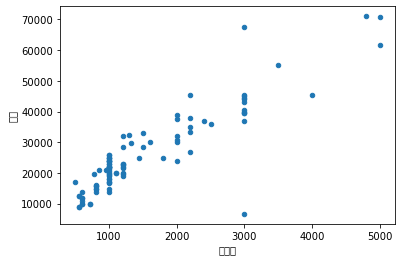

In [53]:
B.plot.scatter(x='그람수', y='가격')

 #### 첫번째 execel파일인 가공 닭가슴살 데이터의 분포도를 시각화했을 때
 
 #### 가공 닭가슴살 판매 제품의 그람수가 대체적으로 1키로~3키로 사이에 분포하는 것을 확인함.

***

#### 가설 1번(닭가슴살 제품): 대체적으로 g당 가격이 낮을 수록 닭가슴살 제품 판매 순위가 높을 것이다.


In [4]:
B['총 지불비용']=B['가격']+B['배송비']

In [5]:
B['100g당 가격']=B['총 지불비용']/B['그람수']*100

In [6]:
B[['제품명','100g당 가격', '판매순위']]

,제품명,100g당 가격,판매순위
0,하림 닭가슴살 블랙페퍼,1718.750000,1
1,한끼 통살 그릴드 닭가슴살 5종,2390.000000,2
2,햇살닭 저염 훈제닭가슴살 플러스(냉동),1950.000000,3
3,한끼 통살 통살 닭가슴살 허니소이 (냉동),2190.000000,4
4,한끼통살 닭가슴살 데리야끼,2190.000000,5
...,...,...,...
95,채우닭 실온 닭가슴살 오리지날 30팩,2250.000000,96
96,이츠웰 부드러운 닭가슴살 스팀,1790.000000,97
97,교촌 프레시업 슬라이스 닭가슴살 4종 22팩,1359.090909,98
98,곰곰 허브 닭가슴살(냉장),1634.545455,99


판매순위를 기준으로 상(1 ~ 33위), 중(34 ~ 67위), 하(68~100위)로 나누어 각 집단의 평균 및 분산 등의 통계량을 계산

In [7]:
top=B.loc[:32, ['100g당 가격']]
top.describe()

,100g당 가격
count,33.000000
mean,1925.124442
std,362.083405
min,1199.500000
25%,1673.333333
50%,1899.000000
75%,2190.000000
max,2658.333333


In [8]:
mid=B.loc[33:66, ['100g당 가격']]
mid.describe()

,100g당 가격
count,34.000000
mean,1792.985138
std,477.388424
min,222.000000
25%,1487.500000
50%,1763.125000
75%,2192.500000
max,2490.000000


In [9]:
bot=B.loc[67:100, '100g당 가격']
bot.describe()

count      33.000000
mean     1892.942354
std       539.720108
min      1226.666667
25%      1516.666667
50%      1790.000000
75%      2115.000000
max      3980.000000
Name: 100g당 가격, dtype: float64

#### 가설 1번 (가공닭가슴살) 결론: 
가공닭가슴살 제품에서 100g당 가격과 판매순위의 유의미한 관계는 발견되지 않음.
(평균, 분산 모두 큰 차이x) 

---

In [10]:
A= pandas.read_excel("C:\\Users\\USER\\생닭가슴살 판매량 정리.xlsx")

<AxesSubplot:xlabel='그람수', ylabel='가격'>

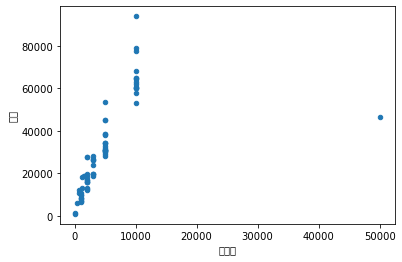

In [54]:
A.plot.scatter(x='그람수', y='가격')

두번째 excel파일인 생닭가슴살 데이터의 분포도를 시각화했을 때

생닭가슴살 판매 제품의 경우 10키로까지의 판매가 많고 5키로 이하에 제품이 몰려있는 것을 확인함.

***

#### 가설 1번(생닭가슴살 제품): 대체적으로 100g당 가격이 낮을 수록 생닭가슴살 판매순위가 높을 것이다.

In [12]:
A['총 가격']=A['가격']+A['배송비']
A['100g당 가격']=A['총 가격']/A['그람수']*100
A

,브랜드명,그람수,가격,판매순위,배송비,총 가격,100g당 가격
0,하림,2000,17000,1,0,17000,850.000000
1,하림,800,10690,2,0,10690,1336.250000
2,하림,400,6110,3,0,6110,1527.500000
3,곰곰,1000,10590,4,0,10590,1059.000000
4,올품,2000,16660,5,0,16660,833.000000
...,...,...,...,...,...,...,...
70,지에스리테일,1200,18500,71,0,18500,1541.666667
71,언니네,10000,64900,72,3500,68400,684.000000
72,토탈닭컴,5000,31180,73,3000,34180,683.600000
73,토탈닭컴,10000,60060,74,3500,63560,635.600000


In [13]:
top2=A.loc[:24, ['100g당 가격']]
top2.describe()

,100g당 가격
count,25.000000
mean,852.276667
std,227.797667
min,565.000000
25%,690.000000
50%,828.000000
75%,940.000000
max,1527.500000


In [14]:
mid2=A.loc[25:49, ['100g당 가격']]
mid2.describe()

,100g당 가격
count,25.000000
mean,967.868667
std,682.304718
min,605.000000
25%,710.000000
50%,795.000000
75%,940.000000
max,4083.333333


In [15]:
bot2=A.loc[50:78, '100g당 가격']
bot2.describe()

count      25.000000
mean     1002.770667
std       621.369401
min        93.200000
25%       683.600000
50%       770.000000
75%      1260.000000
max      3416.666667
Name: 100g당 가격, dtype: float64

#### 가설 1번 (생닭가슴살) 결론: 생닭가슴살의 경우 100g당 가격이 낮을 수록 판매순위가 높다! (예측과 동일)

상위그룹:852.27원 , 중간그룹: 967.87원 , 하위그룹: 1020.93원

***

#### 가설 2번:가공닭가슴살과 냉동 닭가슴살의 고가, 중가, 저가의 카테고리에서 같은 브랜드의 제품이 비슷한 판매순위를 가질 것 이다.



In [16]:
mod=B.loc[:32, ['판매순위', '브랜드']]
mod
mod1 = mod.reset_index()
del mod1['index']


In [17]:
mod2=B.loc[33:66, ['판매순위','브랜드']]
mod2
mod22=mod2.reset_index()
del mod22['index']


In [18]:
mod3=B.loc[67:100, ['판매순위','브랜드']]
mod3
mod33=mod3.reset_index()
del mod33['index']


In [19]:
moda=pandas.concat([mod1, mod22,mod33],axis=1)
moda

,판매순위,브랜드,판매순위,브랜드,판매순위,브랜드
0,1.0,하림,34,코스트코,68.0,한끼통살
1,2.0,한끼통살,35,육식토끼,69.0,맛있닭
2,3.0,햇살닭,36,햇살닭,70.0,킹닭
3,4.0,한끼통살,37,굽네,71.0,굽네
4,5.0,한끼통살,38,한끼통살,72.0,햇살닭
5,6.0,곰곰,39,곰곰,73.0,곰곰
6,7.0,한끼통살,40,그릭슈바인,74.0,하림
7,8.0,맛있닭,41,한끼,75.0,브랜드닭
8,9.0,하림,42,하림,76.0,잇메이트
9,10.0,굽네,43,한끼통살,77.0,곰곰


In [20]:
f1=mod1.value_counts('브랜드')

In [21]:
f2=mod22.value_counts('브랜드')

In [22]:
f3=mod33.value_counts('브랜드')

In [23]:
F1=f1.head(3)
F2=f2.head(3)
F3=f3.head(3)
FA=pandas.concat([F1, F2,F3],axis=1)

FA

,0,1,2
브랜드,,,
한끼통살,8.0,4.0,NaN
하림,6.0,3.0,NaN
곰곰,4.0,5.0,3.0
햇살닭,NaN,NaN,3.0
브랜드닭,NaN,NaN,3.0


가공닭가슴살의 각 카테고리별 빈도수계산

In [24]:
p=A.loc[:24, ['판매순위', '브랜드명']]
p1 = p.reset_index()
del p1['index']

In [25]:
p_2=A.loc[25:49, ['판매순위', '브랜드명']]
p2 = p_2.reset_index()
del p2['index']


In [26]:
p_3=A.loc[50:77, ['판매순위', '브랜드명']]
p3 = p_3.reset_index()
del p3['index']

In [27]:
f_1=p1.value_counts('브랜드명')

In [28]:
f_2=p2.value_counts('브랜드명')

In [29]:
f_3=p3.value_counts('브랜드명')

In [30]:
P1=f_1.head(3)
P2=f_2.head(3)
P3=f_3.head(3)
PA=pandas.concat([P1, P2,P3],axis=1)

PA
#생닭가슴살 카테고리별 빈도수

,0,1,2
브랜드명,,,
올품,5.0,2.0,NaN
하림,5.0,3.0,NaN
목우촌,3.0,NaN,NaN
모디바,NaN,2.0,NaN
토탈닭컴,NaN,NaN,4.0
하나푸드,NaN,NaN,3.0
그린푸드,NaN,NaN,2.0


In [31]:
FA
#가공닭가슴살 카테고리별 빈도수

,0,1,2
브랜드,,,
한끼통살,8.0,4.0,NaN
하림,6.0,3.0,NaN
곰곰,4.0,5.0,3.0
햇살닭,NaN,NaN,3.0
브랜드닭,NaN,NaN,3.0


#### 가설 2번 결론:
    생닭가슴살의 고가제품군에서는 올품, 하림, 목우촌
    중가에서도 올품, 하림, 목우촌
    저가에서는 토탈닭컴, 하나푸드, 아임닭의 판매순위가 높았음
    
    가공닭가슴살의 고가제품군에서는 한끼통살, 하림, 곰곰
    중가에서도 한끼통살, 하림, 곰곰
    저가에서는 곰곰, 햇살닭, 브랜드닭 순서로 판매순위가 높았음
    
    1.생닭가슴살과 가공닭가슴살의 브랜드는 하림 제외 모두 달랐음-> 시장자체가 다른것으로 보임
    2.생닭가슴살과 가공닭가슴살 모두 고가와 중가에서 같은 브랜드들이 높은 점유율을 보이고 저가에서 새로운 브랜드들이 경쟁하는 것으로 보임


***

#### 가설 3번: 배송비용이 있는 제품과 없는 제품을 나누어서 분석하면 100g당 가격의 평균은 같을 것이다.


In [32]:
d=A[['배송비', '100g당 가격']]
c=d.loc[d['배송비']==0]

In [33]:
c.mean()

배송비           0.000000
100g당 가격    857.747154
dtype: float64

In [34]:
u=A[['배송비', '100g당 가격']]
v=d.loc[d['배송비']> 0]

In [35]:
v.mean()

배송비         3441.176471
100g당 가격    1041.331373
dtype: float64

#### 가설 3번 결론: 배송비가 따로 부과되는 경우가 무료배송인 경우보다 평균적으로 더 비싸다.

무료배송 : 872.44원, 배송비있는 경우 : 1041.33원

***

#### 가설4번(가공 닭가슴살): 제품무게가 무거울수록 g당 가격이 저렴할 것이다.


In [36]:
s1=B.sort_values(by=[B.columns[1]], ascending=True)

In [37]:
s1_1=s1[['그람수', '100g당 가격']]
s1_2=s1_1.reset_index()
s1_2

,index,그람수,100g당 가격
0,88,500,3980.000000
1,45,550,2254.545455
2,19,550,2254.545455
3,98,550,1634.545455
4,43,550,1634.545455
...,...,...,...
95,90,3500,1571.428571
96,60,4000,1133.500000
97,46,4800,1479.375000
98,83,5000,1413.000000


낮은 무게 그룹

In [38]:
s_low_m=s1_2.loc[:32, '그람수']
print("제품 무게 평균:", s_low_m.mean()/1000,"kg")

제품 무게 평균: 0.7915151515151515 kg


In [39]:
s_low=s1_2.loc[:32, ['100g당 가격']]
s_low.describe()

,100g당 가격
count,33.000000
mean,2042.997998
std,478.153080
min,1387.500000
25%,1703.000000
50%,1975.000000
75%,2290.000000
max,3980.000000


중간 무게 그룹

In [40]:
s_mid_m=s1_2.loc[33:66, '그람수']
print("제품 무게 평균:", s_mid_m.mean()/1000,"kg")

제품 무게 평균: 1.1105882352941177 kg


In [41]:
s_mid=s1_2.loc[33:66, ['100g당 가격']]
s_mid.describe()


,100g당 가격
count,34.000000
mean,2056.533782
std,331.424735
min,1395.000000
25%,1795.397727
50%,2005.500000
75%,2335.037879
max,2658.333333


무게 높은 그룹

In [42]:
s_high_m=s1_2.loc[67:100, '그람수']
print("제품 무게 평균:", s_high_m.mean()/1000, "kg")

제품 무게 평균: 2.7606060606060607 kg


In [43]:
s_high=s1_2.loc[67:100, '100g당 가격']
s_high.describe()

count      33.000000
mean     1503.533832
std       345.209468
min       222.000000
25%      1349.666667
50%      1497.000000
75%      1595.500000
max      2250.000000
Name: 100g당 가격, dtype: float64

#### 가설 4번 (가공 닭가슴살) 결론: 
    판매 중량이 높을 수록 평균적인 100g당 가격이 저렴하다 
    (그람당 가격 기준 높은 그룹과 낮은 그룹의 판매중량의 차이는 거의 없음)

    판매중량 high (2.76 kg) = 1503.53원

    판매중량 mid(1.11 kg) = 2056.53원

    판매중량 low(0.79 kg) = 2042.99원

***

#### 가설 4번(생닭가슴살) : 제품무게가 무거울수록 g당 가격이 저렴할 것이다.



In [44]:
s2=A.sort_values(by=[A.columns[1]], ascending=True)
s2

,브랜드명,그람수,가격,판매순위,배송비,총 가격,100g당 가격
48,푸르델리,120,900,49,4000,4900,4083.333333
54,새벽닭,120,1100,55,3000,4100,3416.666667
2,하림,400,6110,3,0,6110,1527.500000
1,하림,800,10690,2,0,10690,1336.250000
38,하림,800,12250,39,0,12250,1531.250000
...,...,...,...,...,...,...,...
53,다고리,10000,65000,54,0,65000,650.000000
16,금보식품,10000,53000,17,3500,56500,565.000000
20,모디바,10000,64500,21,3000,67500,675.000000
49,하림,10000,79180,50,8000,87180,871.800000


In [45]:
s2_1=s2[['그람수', '100g당 가격']]
s2_2=s2_1.reset_index()
s2_2

,index,그람수,100g당 가격
0,48,120,4083.333333
1,54,120,3416.666667
2,2,400,1527.500000
3,1,800,1336.250000
4,38,800,1531.250000
...,...,...,...
70,53,10000,650.000000
71,16,10000,565.000000
72,20,10000,675.000000
73,49,10000,871.800000


낮은 무게 그룹

In [46]:
s2_low_m=s2_2.loc[:24, '그람수']
print("제품 무게 평균:", s2_low_m.mean()/1000,"kg")

제품 무게 평균: 1.2255999999999998 kg


In [47]:
s2_low=s2_2.loc[:24, ['100g당 가격']]
s2_low.describe()

,100g당 가격
count,25.000000
mean,1354.206667
std,774.082496
min,775.000000
25%,940.000000
50%,1100.000000
75%,1527.500000
max,4083.333333


중간 무게 그룹

In [48]:
s2_mid_m=s2_2.loc[24:48, '그람수']
print("제품 무게 평균:", s2_mid_m.mean()/1000,"kg")

제품 무게 평균: 3.56 kg


In [49]:
s2_mid=s2_2.loc[24:48, ['100g당 가격']]
s2_mid.describe()

,100g당 가격
count,25.000000
mean,787.837333
std,111.704829
min,600.000000
25%,690.000000
50%,770.000000
75%,876.666667
max,1023.333333


높은 무게 그룹

In [50]:
s2_high_m=s2_2.loc[50:, '그람수']
print("제품 무게 평균:", s2_high_m.mean()/1000,"kg")

제품 무게 평균: 9.8 kg


In [51]:
s2_high=s2_2.loc[50:, ['100g당 가격']]
s2_high.describe()

,100g당 가격
count,25.000000
mean,690.472000
std,181.346546
min,93.200000
25%,624.000000
50%,650.000000
75%,778.000000
max,1076.000000


#### 가설 4번 (생닭가슴살) 결론:
    대체적으로 판매 중량이 높을 수록 평균적인 100g당 가격이 저렴하고 

    무게가 낮은 그룹의 가격이 다른 그룹(중간, 높은 그룹)에 비해 특히 더 비쌈.
    
    판매중량 high (9.8 kg) = 690.47원

    판매중량 mid(3.56 kg) = 787.83원

    판매중량 low(1.22 kg) = 1354.20원

### 추가적으로 생닭가슴살이 가공닭가슴살보다 2배정도 저렴하다는 것도 알 수 있었음

참고자료: 강의자료, 쿠팡 닭가슴살 제품 정보